In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

%matplotlib inline

In [47]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


We can see there is no missing data or null data

In [49]:
# Change the Gender in a numerical column
df['Gender'].replace({'Male':1,"Female":0},inplace=True)

In [50]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


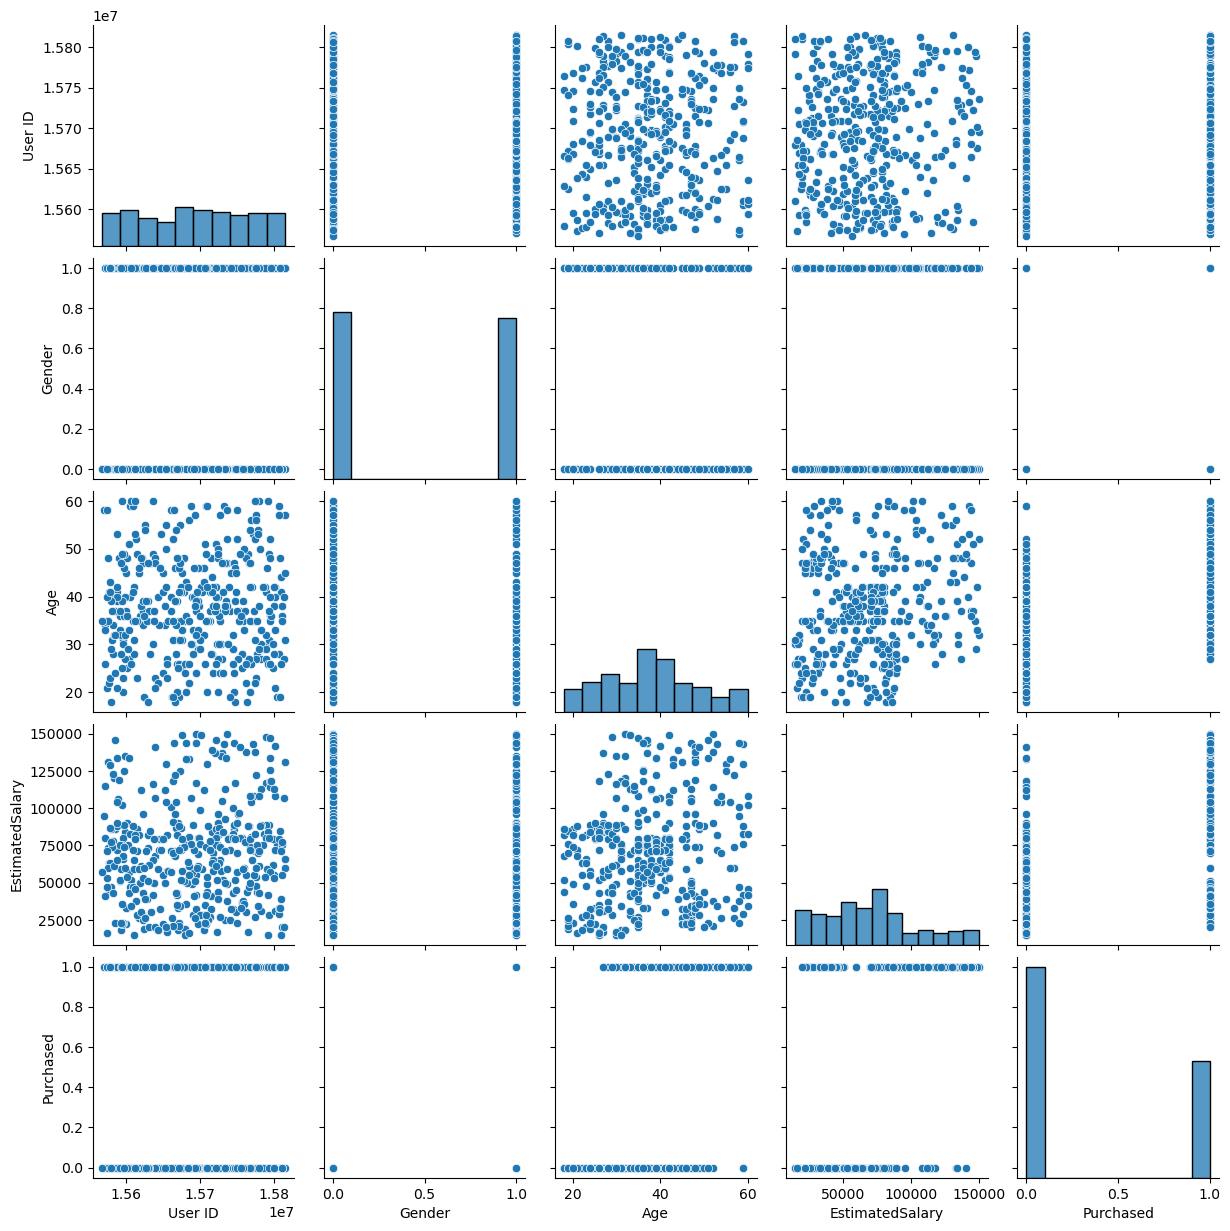

In [51]:
sns.pairplot(df)
plt.show()

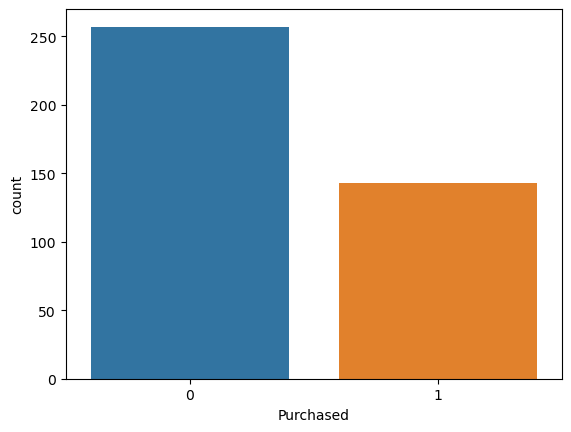

In [52]:
# check the relationship between the gender and the purcchased
sns.countplot(x=df.Purchased,data=df)
plt.show()

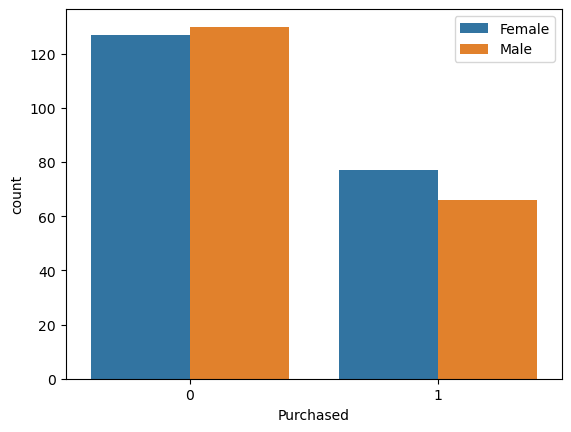

In [53]:
sns.countplot(x='Purchased',hue= 'Gender',data=df)
plt.legend(['Female','Male'])

- AS we can see there is no linear realtionship btw the columns
- And almost count of purchased and not Purchased in gender is equally distributed
- B\Now check the relationship betweent the purcahse and the estimated salary

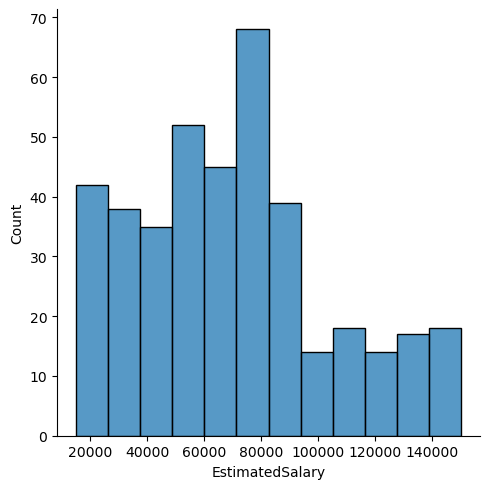

In [54]:
sns.displot(x='EstimatedSalary',data=df)


In [55]:
# Purchased has no dependency on the UserID so we can drop the USerID column

df.drop('User ID',axis=1,inplace=True)

In [77]:
X=df.iloc[:,:-1].values
y=df['Purchased']

In [78]:
X

array([[    1,    19, 19000],
       [    1,    35, 20000],
       [    0,    26, 43000],
       ...,
       [    0,    50, 20000],
       [    1,    36, 33000],
       [    0,    49, 36000]], dtype=int64)

In [58]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [113]:
# Split the train test data
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.2,random_state=1)

In [114]:
print(X_train.ndim)
print(y_train.ndim)
print(X_test.ndim)
print(y_test.ndim)

2
1
2
1


In [115]:
# Standardrize the data
from sklearn.preprocessing import StandardScaler
stndard = StandardScaler()
X_train = stndard.fit_transform(X_train)
X_test = stndard.transform(X_test)

In [116]:
from sklearn.linear_model import LogisticRegression
LR= LogisticRegression(random_state=0)
LR.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [117]:

y_pred = LR.predict(X_test)

In [118]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[40  8]
 [ 6 26]]


In [119]:
from sklearn import metrics

In [120]:
metrics.roc_curve(y_test,y_pred)

(array([0.        , 0.16666667, 1.        ]),
 array([0.    , 0.8125, 1.    ]),
 array([2, 1, 0], dtype=int64))

In [121]:
metrics.roc_auc_score(y_test,y_pred)

0.8229166666666667

In [122]:
metrics.accuracy_score(y_test,y_pred)

0.825

In [123]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85        48
           1       0.76      0.81      0.79        32

    accuracy                           0.82        80
   macro avg       0.82      0.82      0.82        80
weighted avg       0.83      0.82      0.83        80

